Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1) Read the column description and ensure you understand each attribute well

2) Study the data distribution in each attribute, share your findings. (5 points)

3) Get the target column distribution. Your comments

4) Split the data into training and test set in the ratio of 70:30 respectively

5) Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)


6) Print the confusion matrix for all the above models (5 points)

7)  Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Column description

1)ID	Customer ID <br>

2)Age	Customer's age in completed years <br>

3)Experience	#years of professional experience<br>

4)Income	Annual income of the customer in dollars <br>

5)ZIPCode	Home Address ZIP code. <br>

6)Family	Family size of the customer <br>

7)CCAvg	Avg. spending on credit cards per month in dollars <br>

8)Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>

9)Mortgage	Value of house mortgage if any. in dollars <br>

10)Personal Loan	Did this customer accept the personal loan offered in the last campaign? <br>

11)Securities Account	Does the customer have a securities account with the bank? <br>

12)CD Account	Does the customer have a certificate of deposit (CD) account with the bank? <br>

13)Online	Does the customer use internet banking facilities? <br>

14)CreditCard	Does the customer use a credit card issued by UniversalBank? <br>

# Q1) Answer: Reading and understanding the data

In [2]:
df_Thera=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv" )

In [3]:
df_Thera.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df_Thera.rename(columns={'Personal Loan': 'Personal_Loan', 'Securities Account': 'Securities_Account','CD Account':'CD_Account'}, inplace=True)


In [5]:
df_Thera.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df_Thera.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
df_Thera.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Q2) Answer: Findings based on Distribution

Findings based on Distribution

*Age*: Average age of dataset is 45 years +or- 11.5 years

*Experience*: Avg experience dataset is around 20 years + or - 11.5 years with some applicants having -ve work experience this will require outlier treatment as work experience cannot be negative

*Income*: Average income of dataset is 73.7$ + or - 46$ as the standard deviation is 46$ the Max income 224 seems very excessive and may require an outlier treatment

*Mortgage* Average mortgage is 56$,  + or - 101 $ as the standard deviation 101$ we may have to check if there is a need for outlier treatment

In [8]:
df_Thera.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

C:\Users\neeha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\neeha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


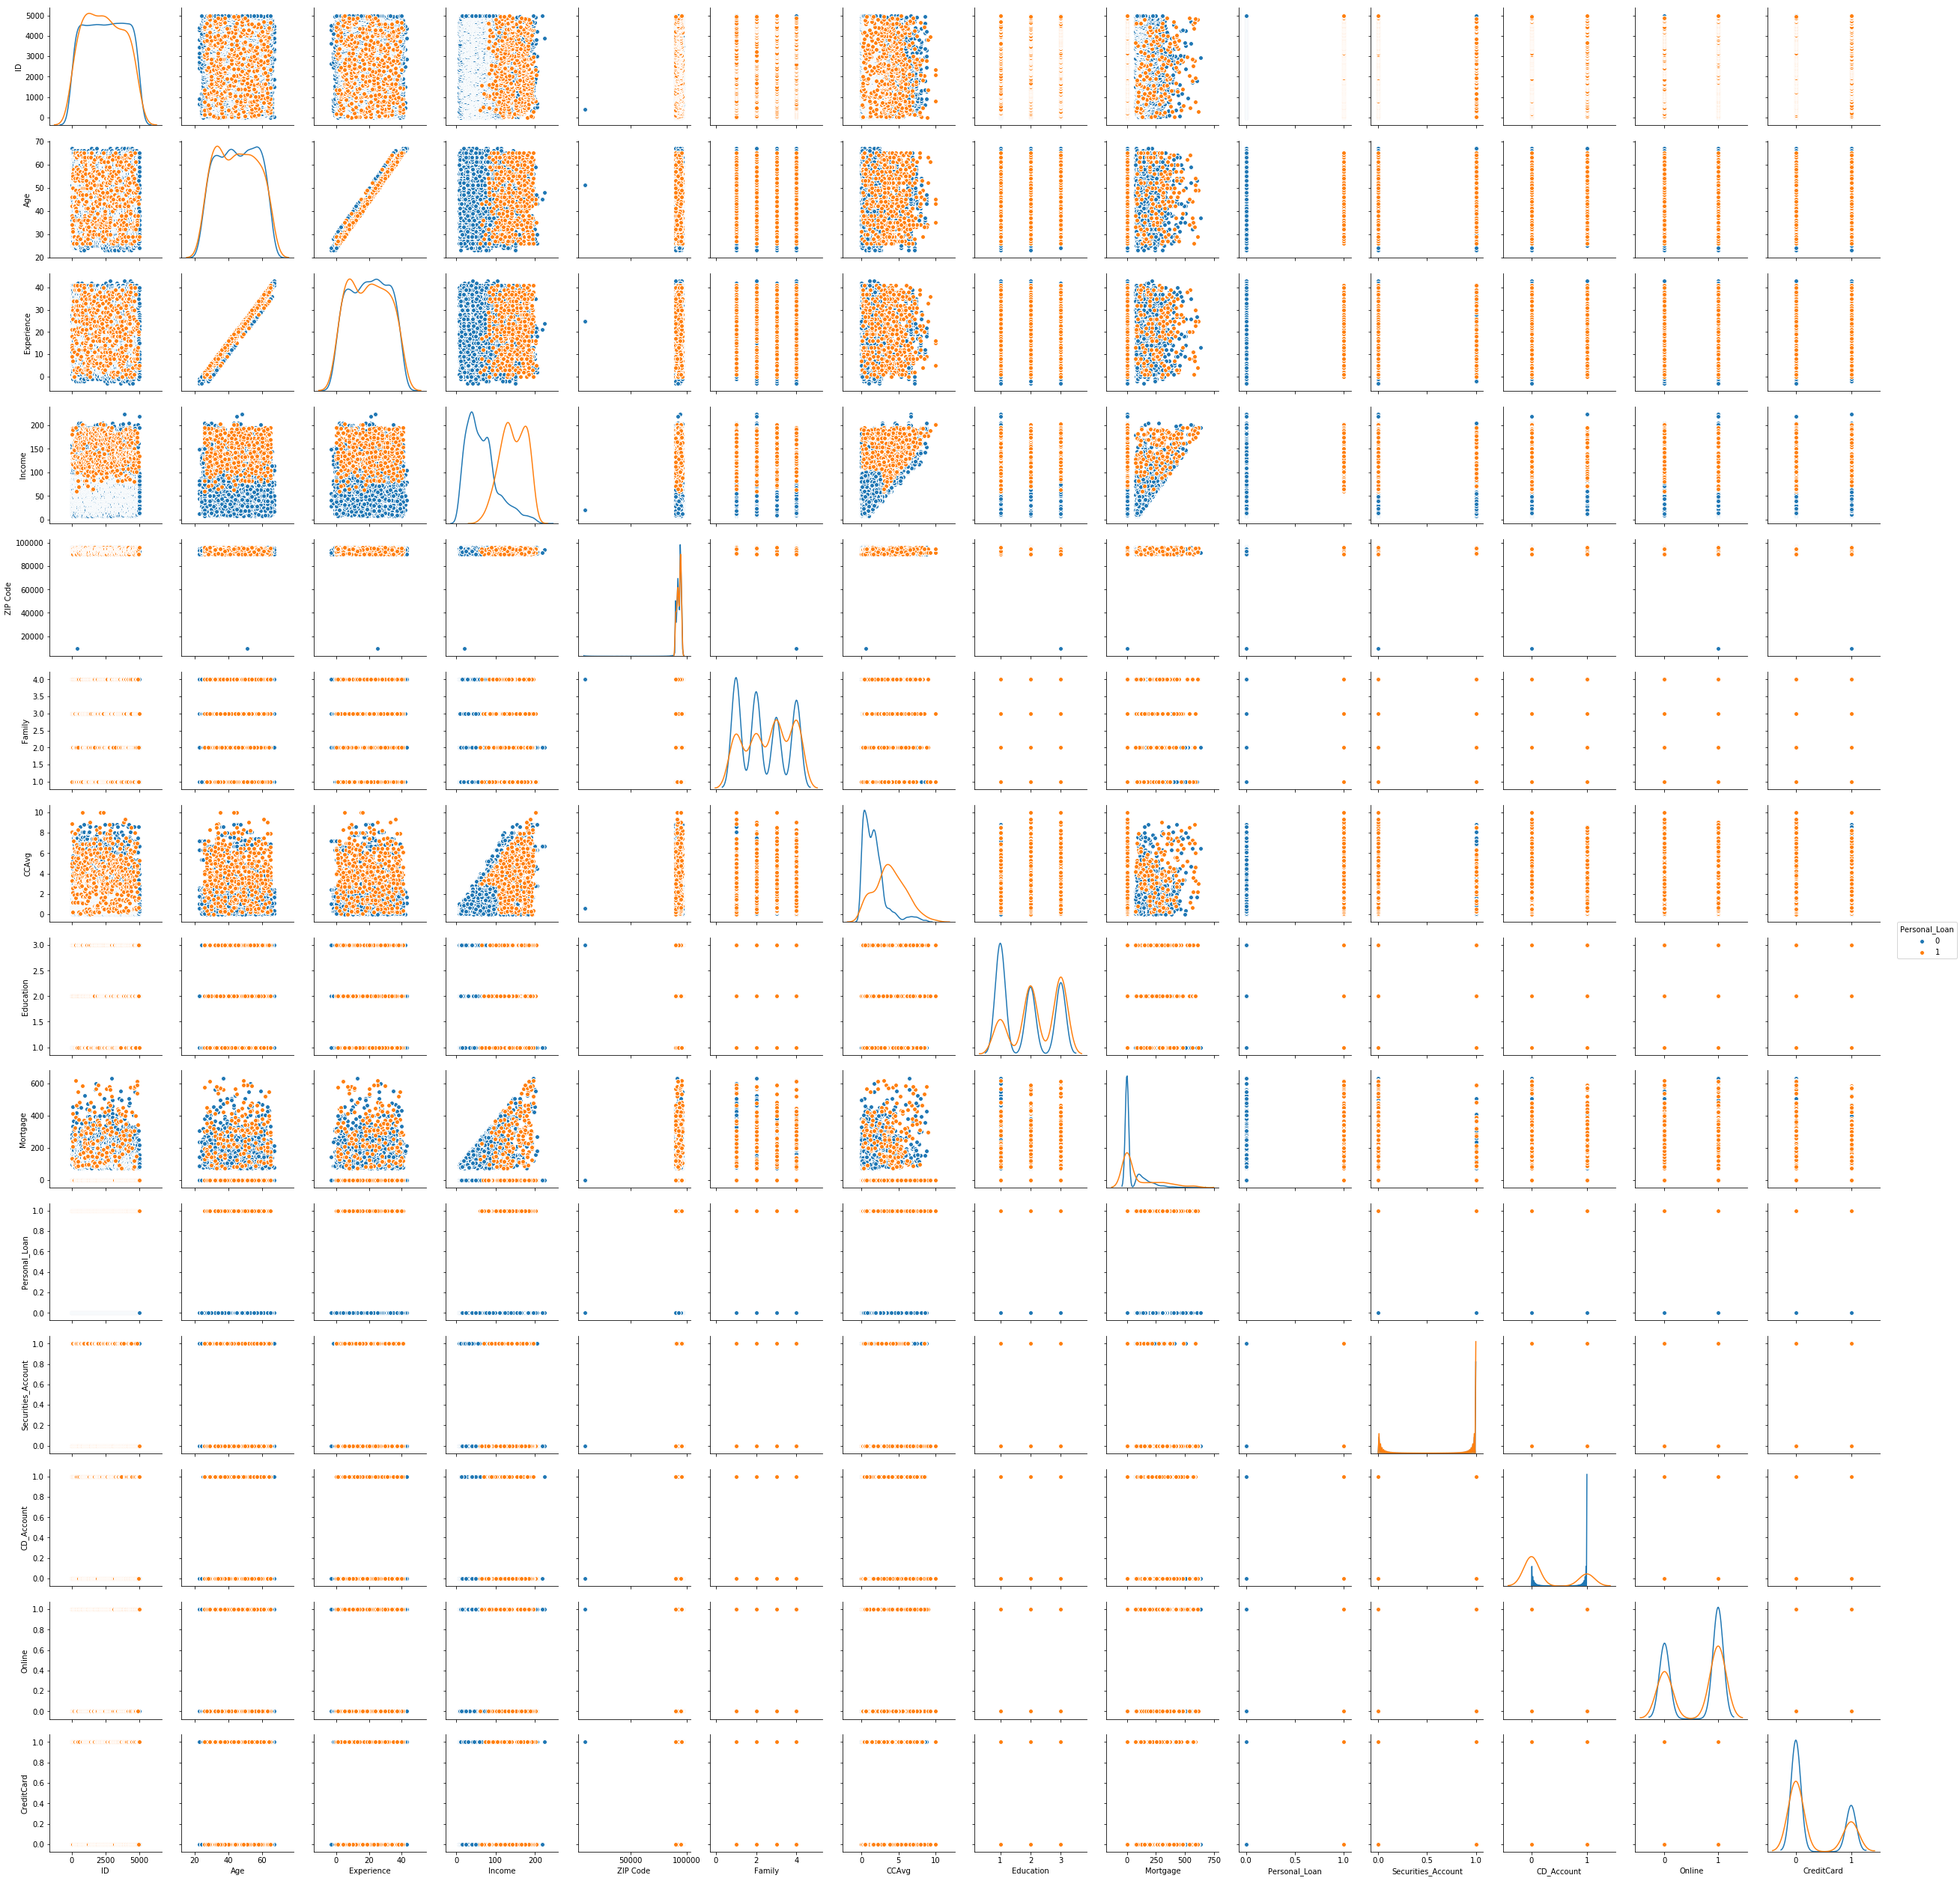

In [9]:
import seaborn as sns
g =sns.pairplot(df_Thera,hue="Personal_Loan", diag_kind = 'kde')

In [10]:
df_Thera.corr().transpose()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


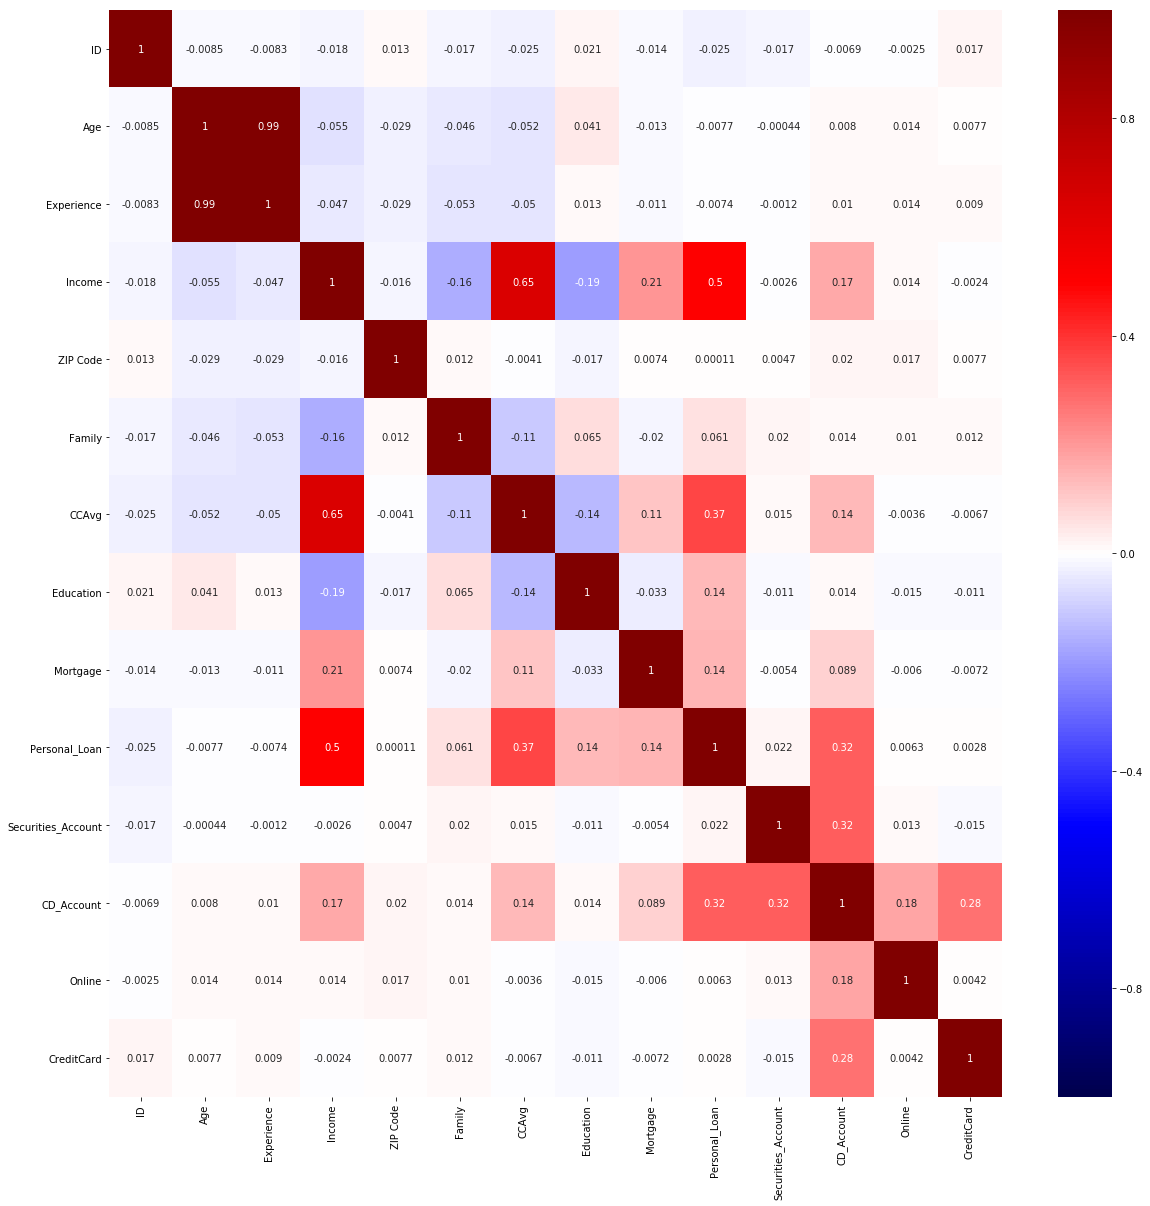

In [11]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(df_Thera.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


Age              AxesSubplot(0.125,0.125;0.133621x0.755)
Experience    AxesSubplot(0.285345,0.125;0.133621x0.755)
Income         AxesSubplot(0.44569,0.125;0.133621x0.755)
CCAvg         AxesSubplot(0.606034,0.125;0.133621x0.755)
Mortgage      AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

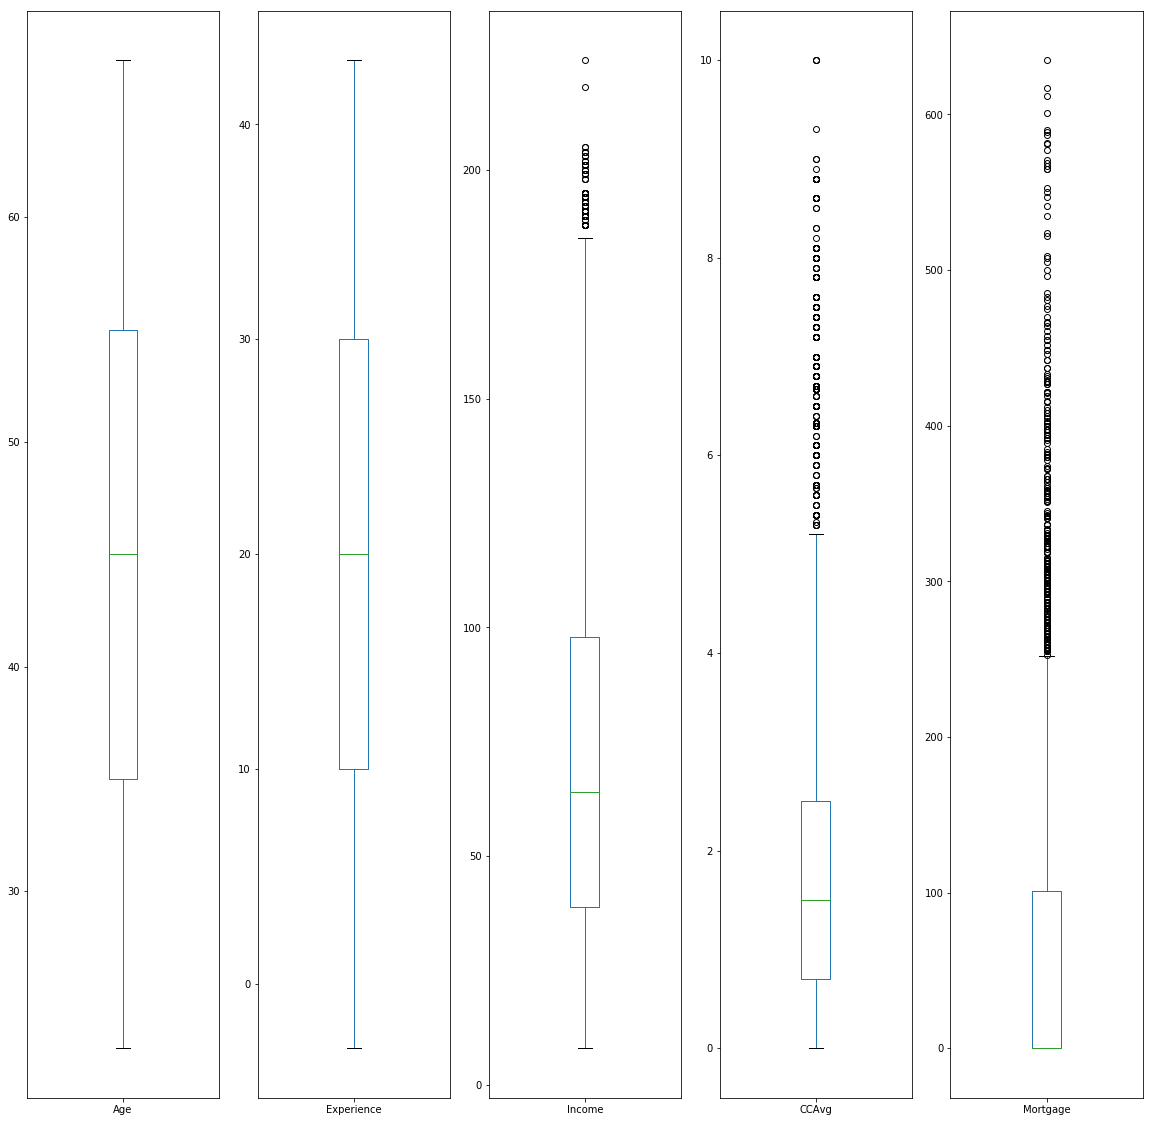

In [12]:
#plt.subplots(figsize=(20,20))

df_Thera[['Age','Experience','Income','CCAvg','Mortgage']].plot(kind='box',subplots=True,figsize=(20,20))

In [13]:
#df_Thera[['Age','Experience','Income','CCAvg','Mortgage']].boxplot(return_type='dict', figsize=(10,10), fontsize=30,)
#plt.plot
#plt.xticks(rotation=-45)


# Q3) Ans: Target Variable Distribution

In [14]:
df_Thera.groupby(["Personal_Loan"]).count()

# Most of the targets do not have Personal Loans. The ratio is almost 1:10 in favor or class 0.  
# The model's ability to predict class 0 will be better than predicting class 1. 


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


# Most of the targets do not have Personal Loans. The ratio is almost 1:10 in favor or class 0.  

# The model's ability to predict class 0 will be better than predicting class 1. 


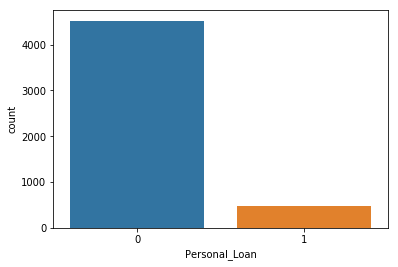

In [15]:
sns.countplot(x='Personal_Loan', data=df_Thera)

# Q4) Answer Splitting the Data into 70:30 

In [16]:
df_Thera_new=df_Thera

In [17]:
X = df_Thera_new.drop("Personal_Loan" , axis=1, inplace=False)

y = df_Thera_new["Personal_Loan"]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Q5) Answer: Using different classification models  (Logistic, K-NN and Naïve Bayes)

# Logistic Regression

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
y_train.value_counts()

0    3158
1     342
Name: Personal_Loan, dtype: int64

In [21]:
342/3158*100

10.829639012032931

In [22]:
y_test.value_counts()

0    1362
1     138
Name: Personal_Loan, dtype: int64

In [23]:
138/1362*100

10.13215859030837

As we can see the Ratio of 0's & 1's is almost even between Test and Train we can proceed with the testing

In [24]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state = 0)

In [25]:
Classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred=Classifier.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[1341,   21],
       [  50,   88]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score, classification_report


In [31]:
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))

accuracy: 0.9526666666666667 %
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1362
          1       0.81      0.64      0.71       138

avg / total       0.95      0.95      0.95      1500



# To Improve the Accuracy we will remove the Outlier, unnecessary variables and Scale the data

In [32]:
import statsmodels.formula.api as sm

regressor_OLS=sm.OLS(endog=y, exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal_Loan   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     307.5
Date:                Sat, 02 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:49:31   Log-Likelihood:                 235.66
No. Observations:                5000   AIC:                            -445.3
Df Residuals:                    4987   BIC:                            -360.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
ID                 -3.238e-06   2.27e-06     -1.429      0.153   -7.68e-06    1.21e-06
Age                   -0.0081      0.002     -3.228      0.001      -0.013      -0.003
Experience             0.0085      0.003      3.391      0.001       0.004       0.013
Income                 0.0030   9.65e-05     30.946      0.000       0.003       0.003
ZIP Code           -1.748e-06   6.73e-07     -2.598      0.009   -3.07e-06   -4.29e-07
Family                 0.0331      0.003     11.422      0.000       0.027       0.039
CCAvg                  0.0120      0.002      4.884      0.000       0.007       0.017
Education              0.0801      0.004     19.487      0.000       0.072       0.088
Mortgage            6.434e-05    3.3e-05      1.952      0.051   -2.73e-07       0.000
Securities_Account    -0.0608      0.011     -5.330      0.000      -0.083      -0.038
CD_Account             0.3300      0.016     20.857      0.000       0.299       0.361
Online                -0.0267      0.007     -3.924      0.000      -0.040      -0.013
CreditCard            -0.0453      0.008     -5.996      0.000      -0.060      -0.030
==============================================================================
Omnibus:                     1307.067   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3401.152
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                       5.899   Cond. No.                     4.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dropping ID from the list of variables and fixing the outliers

In [33]:
X.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [34]:
X_new=X.iloc[:,1:13]

In [35]:
X_new.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [36]:
X_new.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
#Outlier Treatment
X_new["Experience"]=X_new["Experience"].map(lambda x: 0 if x<0 
     else x)

X_new["Experience"].describe()


count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=7)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#y_train=sc.fit_transform(y_train)
#y_test=sc.fit_transform(y_test)

In [40]:
from sklearn.linear_model import LogisticRegression
Classifier_new = LogisticRegression()

In [41]:
Classifier_new.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
y_pred=Classifier_new.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
import statsmodels.formula.api as sm

regressor_OLS=sm.OLS(endog=y, exog=X_new).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal_Loan   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     332.6
Date:                Sat, 02 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:49:32   Log-Likelihood:                 233.53
No. Observations:                5000   AIC:                            -443.1
Df Residuals:                    4988   BIC:                            -364.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0072      0.002     -2.895      0.004      -0.012      -0.002
Experience             0.0077      0.003      3.057      0.002       0.003       0.013
Income                 0.0030   9.66e-05     30.944      0.000       0.003       0.003
ZIP Code           -2.056e-06   6.68e-07     -3.076      0.002   -3.37e-06   -7.46e-07
Family                 0.0331      0.003     11.422      0.000       0.027       0.039
CCAvg                  0.0120      0.002      4.882      0.000       0.007       0.017
Education              0.0795      0.004     19.375      0.000       0.071       0.088
Mortgage            6.504e-05    3.3e-05      1.973      0.049    4.14e-07       0.000
Securities_Account    -0.0607      0.011     -5.324      0.000      -0.083      -0.038
CD_Account             0.3305      0.016     20.884      0.000       0.299       0.361
Online                -0.0267      0.007     -3.930      0.000      -0.040      -0.013
CreditCard            -0.0455      0.008     -6.024      0.000      -0.060      -0.031
==============================================================================
Omnibus:                     1308.173   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3406.715
Skew:                           1.408   Prob(JB):                         0.00
Kurtosis:                       5.902   Cond. No.                     4.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))

accuracy: 0.9546666666666667 %
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1362
          1       0.83      0.64      0.72       138

avg / total       0.95      0.95      0.95      1500



In [46]:
X_new.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [47]:
X_new_trial=X_new.drop("ZIP Code" , axis=1, inplace=False)

In [48]:
X_new_trial.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [49]:
X_new_trial["Mortgage"]=X_new_trial["Mortgage"].map(lambda x: 250 if x>250 
     else x)

X_new_trial["Income"]=X_new_trial["Income"].map(lambda x: 180 if x>180 
     else x)
X_new_trial["CCAvg"]=X_new_trial["CCAvg"].map(lambda x: 5 if x>5 
     else x)


X_new_trial.describe()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.119600,73.460000,2.396400,1.817618,1.881000,50.3472,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.440484,45.247031,1.147663,1.420930,0.839869,82.6477,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.0000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.0000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,180.000000,4.000000,5.000000,3.000000,250.0000,1.000000,1.00000,1.000000,1.000000


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_new_trial, y, test_size=0.3, random_state=7)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#y_train=sc.fit_transform(y_train)
#y_test=sc.fit_transform(y_test)
from sklearn.linear_model import LogisticRegression
Classifier_new_T = LogisticRegression()
Classifier_new_T.fit(X_train, y_train)
y_pred=Classifier_new_T.predict(X_test)

In [51]:
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))
Log_acc=accuracy_score(y_test, y_pred)
log_Class=classification_report(y_test, y_pred)

accuracy: 0.958 %
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1362
          1       0.84      0.67      0.75       138

avg / total       0.96      0.96      0.96      1500



In [52]:
from sklearn import metrics
Conf_Log=metrics.confusion_matrix(y_test,y_pred)

# K Nearest Neighbours

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_new_trial, y, test_size=0.3, random_state=7)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier( weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
y_pred=NNH.predict(X_test)

In [56]:
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))

accuracy: 0.958 %
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1362
          1       0.90      0.61      0.73       138

avg / total       0.96      0.96      0.95      1500



# Checking for the Best K Value using Grid Search CV

In [57]:
from sklearn.grid_search import GridSearchCV

k = np.arange(1,100,2) # create a range from 1 to 100 and increment by 2
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, scoring = 'roc_auc', cv=10)
##CV value should be set to 10 only when Data is large enough , when data is less than 5000K then use CV = 3-4 CV (Cross Validation gives more reliable estimate of the model performance)

C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [58]:
GS.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [59]:
GS.best_params_

{'n_neighbors': 27}

In [60]:
GS.best_score_

0.9687236181392388

In [61]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier( n_neighbors=27, weights = 'uniform', 
                           metric = 'euclidean',algorithm='kd_tree' )
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

In [62]:
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))

accuracy: 0.958 %
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1362
          1       0.90      0.61      0.73       138

avg / total       0.96      0.96      0.95      1500



In [63]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier( n_neighbors=27, weights = 'uniform', 
                           metric = 'euclidean',algorithm='ball_tree' )
NNH.fit(X_train,y_train)
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))

accuracy: 0.958 %
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1362
          1       0.90      0.61      0.73       138

avg / total       0.96      0.96      0.95      1500



In [64]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier( n_neighbors=27, weights = 'uniform', 
                           metric = 'euclidean',algorithm='kd_tree' )
NNH.fit(X_train,y_train)
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))

accuracy: 0.958 %
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1362
          1       0.90      0.61      0.73       138

avg / total       0.96      0.96      0.95      1500



In [65]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier( n_neighbors=27, weights = 'uniform', 
                           metric = 'euclidean',algorithm='brute' )
NNH.fit(X_train,y_train) 
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))
KNN_acc=accuracy_score(y_test, y_pred)
KNN_Class=classification_report(y_test, y_pred)

accuracy: 0.958 %
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1362
          1       0.90      0.61      0.73       138

avg / total       0.96      0.96      0.95      1500



In [66]:
Conf_KNN=metrics.confusion_matrix(y_test,y_pred)

# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Multinomial is good for when your features are categorical. 
# Bernoulli is good for making predictions from binary features.
# Gaussian is used when the features are continuous


In [68]:
X_new_trial=X_new.drop("ZIP Code" , axis=1, inplace=False)
X_new_trial["Mortgage"]=X_new_trial["Mortgage"].map(lambda x: 250 if x>250 
     else x)

X_new_trial["Income"]=X_new_trial["Income"].map(lambda x: 180 if x>180 
     else x)
X_new_trial["CCAvg"]=X_new_trial["CCAvg"].map(lambda x: 5 if x>5 
     else x)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X_new_trial, y, test_size = 0.3, random_state = 7)

In [69]:
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [70]:
y_pred=NB.predict(X_test)

In [71]:
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))


accuracy: 0.8913333333333333 %
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1362
          1       0.30      0.13      0.18       138

avg / total       0.86      0.89      0.87      1500



In [72]:
from sklearn.naive_bayes import GaussianNB  # Bernoulli for Binomial
GB = GaussianNB()
GB.fit(X_train, y_train)
y_pred=GB.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))

accuracy: 0.8946666666666667 %
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      1362
          1       0.45      0.66      0.54       138

avg / total       0.92      0.89      0.90      1500



# As X needs to be Non Negative for Multinomial We need to use another scaler to ensure the Multinomial Algorithm works

In [73]:
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_new_trial=X_new.drop("ZIP Code" , axis=1, inplace=False)
X_new_trial["Mortgage"]=X_new_trial["Mortgage"].map(lambda x: 250 if x>250 
     else x)

X_new_trial["Income"]=X_new_trial["Income"].map(lambda x: 180 if x>180 
     else x)
X_new_trial["CCAvg"]=X_new_trial["CCAvg"].map(lambda x: 5 if x>5 
     else x)

X_Mul=min_max.fit_transform(X_new_trial)


#X_transformed=preprocessing.scale(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_Mul, y, test_size = 0.3, random_state = 7)

In [74]:
from sklearn.naive_bayes import MultinomialNB  # Bernoulli for Binomial
MB = MultinomialNB()
MB.fit(X_train, y_train)
y_pred=MB.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred),'%')
print(classification_report(y_test, y_pred))
Bay_acc=accuracy_score(y_test, y_pred)
Bay_Class=classification_report(y_test, y_pred)

accuracy: 0.908 %
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      1362
          1       0.00      0.00      0.00       138

avg / total       0.82      0.91      0.86      1500



C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[1362,    0],
       [ 138,    0]], dtype=int64)

In [76]:
Conf_Bay=metrics.confusion_matrix(y_test,y_pred)

# 5) Print the confusion matrix for all the above models

In [77]:
print('Confusion Matrix of Logistic Regression is:\n', Conf_Log)
print('Confusion Matrix of K Nearest Neighbour is:\n',Conf_KNN)
print('Confusion Matrix of Naive Bayes is:\n',Conf_Bay)

Confusion Matrix of Logistic Regression is:
 [[1344   18]
 [  45   93]]
Confusion Matrix of K Nearest Neighbour is:
 [[1353    9]
 [  54   84]]
Confusion Matrix of Naive Bayes is:
 [[1362    0]
 [ 138    0]]


# Q6)  Conclusion

In [78]:
print('Accuracy Score of Logistic Regression is:\n',Log_acc,'%')
print('Classification Score of Logistic Regression is:\n',log_Class)
print('Accuracy Score of KNN is:\n',KNN_acc,'%')
print('Classification Score of KNN is:\n',KNN_Class)
print('Accuracy Score of Naive Bayes is:\n',Bay_acc,'%')
print('Classification Score of Naive Bayes is:\n',Bay_Class)

Accuracy Score of Logistic Regression is:
 0.958 %
Classification Score of Logistic Regression is:
              precision    recall  f1-score   support

          0       0.97      0.99      0.98      1362
          1       0.84      0.67      0.75       138

avg / total       0.96      0.96      0.96      1500

Accuracy Score of KNN is:
 0.958 %
Classification Score of KNN is:
              precision    recall  f1-score   support

          0       0.96      0.99      0.98      1362
          1       0.90      0.61      0.73       138

avg / total       0.96      0.96      0.95      1500

Accuracy Score of Naive Bayes is:
 0.908 %
Classification Score of Naive Bayes is:
              precision    recall  f1-score   support

          0       0.91      1.00      0.95      1362
          1       0.00      0.00      0.00       138

avg / total       0.82      0.91      0.86      1500



# Conclusion

# As logistic Regression is providing the Best Overall Accuracy along with the highest F1 Score. 

# KNN is also a very good option as it is giving almost the same result without too much effort


# Logistic regression is the Best Algorithm for this use case
